In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sawrupesh04/DataCamp/master/Machine%20Learning/Unsupervised-learning/dataset/company-stock-movements-2010-2015-incl.csv')

In [3]:
df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [4]:
df.set_index('Unnamed: 0', inplace=True)

In [5]:
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


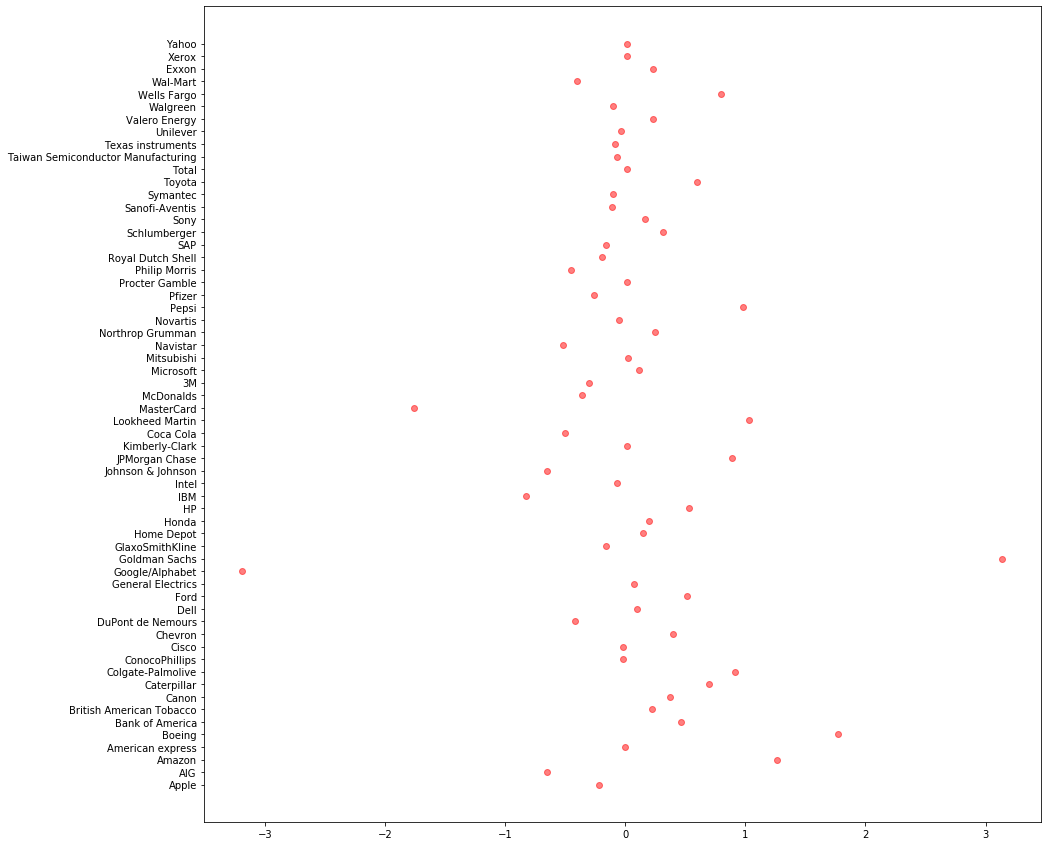

In [59]:
plt.figure(figsize=(15, 15))
plt.scatter(df['2010-01-05'], df.index, c='red', alpha=0.5)

In [6]:
X = df.values

In [7]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [8]:
ks = range(1, 15)
inertias = []

for k in ks:
    # Intialize the Kmean with k cluster
    model = KMeans(n_clusters=k)
    
    # Fit the model
    model.fit(X)
    
    # Append inertia in the inertias
    inertias.append(model.inertia_)

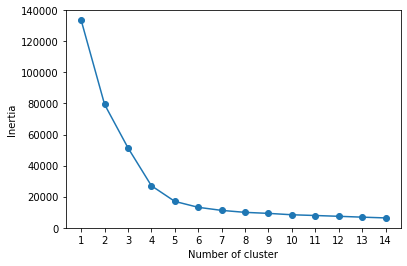

In [9]:
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

<b>Inertia decreases slowly from 10 cluster to 11 cluser, so 10 cluster will be good choice.</b>

In [14]:
# intialize KMeans with 10 cluster
# model = KMeans(n_clusters=10)

# Fit the model
# model.fit(X)

# Get labels from the .predict()
# labels = model.predict(X)

# Stock companies
s_companies = df.index.values


# Create DataFrame with labels and s_companies as columns
#newFrame = pd.DataFrame({'labels': labels, 's_companies': s_companies})

# intialize cross-tabilation
#ct = pd.crosstab(newFrame['labels'], newFrame['s_companies'])

In [11]:
X.shape

(60, 963)

In [12]:
# create normalization
normaizer = Normalizer()

# Intalize KMean with 10 cluster
kmean = KMeans(n_clusters=10)

# make pipeline chaining normalizer and kmean
pipeline = make_pipeline(normaizer, kmean)

# fit the pipeline
pipeline.fit(X)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [15]:
labels = pipeline.predict(X)

newFrame = pd.DataFrame({'labels': labels, 'company': s_companies})


In [16]:
newFrame.sort_values(by='labels')

,labels,company
59,0,Yahoo
2,0,Amazon
46,1,Sanofi-Aventis
52,1,Unilever
58,1,Xerox
30,1,MasterCard
31,1,McDonalds
32,1,3M
34,1,Mitsubishi
35,1,Navistar


### Hierarchical sample of the Data

Scipy <b>linkage()</b> function perform hierarchical clutering on the sample data. Using <b>linkage()</b> function, 
we get the hierarchical cluster of the sample data and use <b>dendrogram()</b> to visualize the result.

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram

# SciPy hierarchical clustering doesn't fit the sklearn pipeline, so we will need to use the normalize
# instread of Normalizer
from sklearn.preprocessing import normalize

In [38]:
company = df.index.values

In [39]:
company

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype=object)

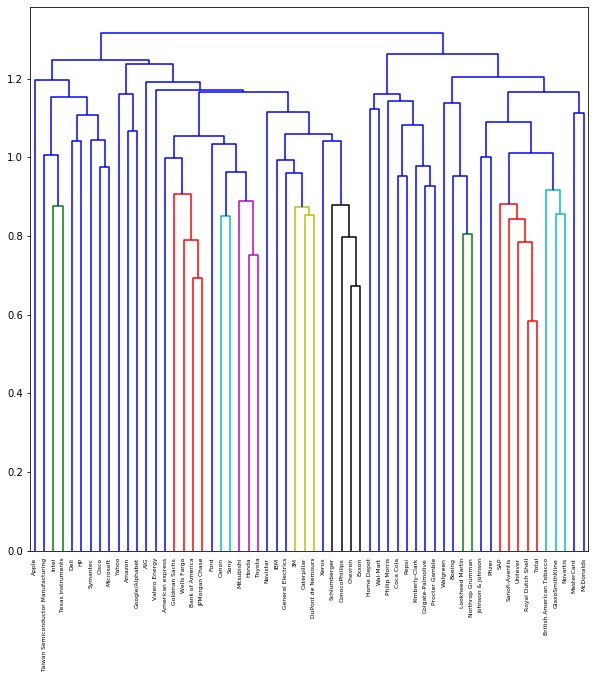

In [42]:
# normalize the sample date
normalize_sample = normalize(X)

# Calculate linkages
mergins = linkage(normalize_sample, method='complete')

# Plot figure size
plt.figure(figsize=(10, 10))

# plot the dendrogram
dendrogram(mergins, labels=company, leaf_font_size=6, leaf_rotation=90)

plt.show()